# Homework1: Fulgence Etienne NDIAYE

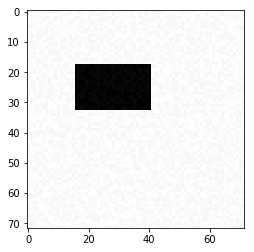

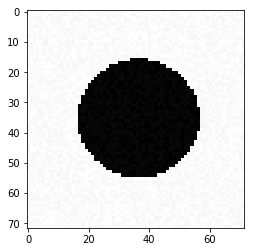

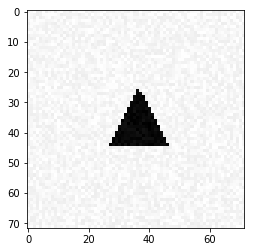

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from keras.utils import np_utils

# On some implementations of matplotlib, you may need to change this value
IMAGE_SIZE = 72

def generate_a_drawing(figsize, U, V, noise=0.0):
    fig = plt.figure(figsize=(figsize,figsize))
    ax = plt.subplot(111)
    plt.axis('Off')
    ax.set_xlim(0,figsize)
    ax.set_ylim(0,figsize)
    ax.fill(U, V, "k")
    fig.canvas.draw()
    imdata = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)[::3].astype(np.float32)
    imdata = imdata + noise * np.random.random(imdata.size)
    plt.close(fig)
    return imdata

def generate_a_rectangle(noise=0.0, free_location=False):
    figsize = 1.0    
    U = np.zeros(4)
    V = np.zeros(4)
    if free_location:
        corners = np.random.random(4)
        top = max(corners[0], corners[1])
        bottom = min(corners[0], corners[1])
        left = min(corners[2], corners[3])
        right = max(corners[2], corners[3])
    else:
        side = (0.3 + 0.7 * np.random.random()) * figsize
        top = figsize/2 + side/2
        bottom = figsize/2 - side/2
        left = bottom
        right = top
    U[0] = U[1] = top
    U[2] = U[3] = bottom
    V[0] = V[3] = left
    V[1] = V[2] = right
    return generate_a_drawing(figsize, U, V, noise)


def generate_a_disk(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        center = np.random.random(2)
    else:
        center = (figsize/2, figsize/2)
    radius = (0.3 + 0.7 * np.random.random()) * figsize/2
    N = 50
    U = np.zeros(N)
    V = np.zeros(N)
    i = 0
    for t in np.linspace(0, 2*np.pi, N):
        U[i] = center[0] + np.cos(t) * radius
        V[i] = center[1] + np.sin(t) * radius
        i = i + 1
    return generate_a_drawing(figsize, U, V, noise)

def generate_a_triangle(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        U = np.random.random(3)
        V = np.random.random(3)
    else:
        size = (0.3 + 0.7 * np.random.random())*figsize/2
        middle = figsize/2
        U = (middle, middle+size, middle-size)
        V = (middle+size, middle-size, middle-size)
    imdata = generate_a_drawing(figsize, U, V, noise)
    return [imdata, [U[0], V[0], U[1], V[1], U[2], V[2]]]

# i add plt.show() in order to show all shapes
im = generate_a_rectangle(10, True)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
#plot a rectangle
plt.show()

im = generate_a_disk(10)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
#plot a disk
plt.show()

[im, v] = generate_a_triangle(20, False)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
#plot a triangle
plt.show()


def generate_dataset_classification(nb_samples, noise=0.0, free_location=False):
    # Getting im_size:
    im_size = generate_a_rectangle().shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros(nb_samples)
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        category = np.random.randint(3)
        if category == 0:
            X[i] = generate_a_rectangle(noise, free_location)
        elif category == 1: 
            X[i] = generate_a_disk(noise, free_location)
        else:
            [X[i], V] = generate_a_triangle(noise, free_location)
        Y[i] = category
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

def generate_test_set_classification():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_classification(300, 20, True)
    Y_test = np_utils.to_categorical(Y_test, 3) 
    return [X_test, Y_test]

def generate_dataset_regression(nb_samples, noise=0.0):
    # Getting im_size:
    im_size = generate_a_triangle()[0].shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros([nb_samples, 6])
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        [X[i], Y[i]] = generate_a_triangle(noise, True)
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

import matplotlib.patches as patches

def visualize_prediction(x, y):
    fig, ax = plt.subplots(figsize=(5, 5))
    I = x.reshape((IMAGE_SIZE,IMAGE_SIZE))
    ax.imshow(I, extent=[-0.15,1.15,-0.15,1.15],cmap='gray')
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])

    xy = y.reshape(3,2)
    tri = patches.Polygon(xy, closed=True, fill = False, edgecolor = 'r', linewidth = 5, alpha = 0.5)
    ax.add_patch(tri)

    plt.show()

def generate_test_set_regression():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_regression(300, 20)
    return [X_test, Y_test]



# 1.1 Simple Classification

In [6]:
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D
from keras.utils import to_categorical

# SGG Optimizer 

In [7]:
[X_train, Y_train] = generate_dataset_classification(300, 20)

#Training parameters
lr=0.001
epochs=20
bs=32
# numbers of classes
nc=3
model = Sequential()
model.add(Dense(nc, kernel_initializer='uniform', input_shape=(X_train.shape[1],)))
model.add(Activation('softmax'))

sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd)

model.fit(X_train, to_categorical(Y_train, num_classes=nc, dtype='float32',), epochs=epochs, batch_size=bs)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
Epoch 1/20
300/300 [==============================] - 6s 19ms/step - loss: 9.7669
Epoch 2/20
300/300 [==============================] - 0s 554us/step - loss: 11.1215
Epoch 3/20
300/300 [==============================] - 0s 494us/step - loss: 11.1215
Epoch 4/20
300/300 [==============================] - 0s 477us/step - loss: 11.1215
Epoch 5/20
300/300 [==============================] - 0s 500us/step - loss: 11.1215
Epoch 6/20
300/300 [==============================] - 0s 627us/step - loss: 11.1215
Epoch 7/20
300/300 [==============================] - 0s 514us/step - loss: 11.1215
Epoch 8/20
300/300 [==============================] - 0s 514us/step - loss: 11.1215
Epoch 9/20
300/300 [==============================] - 0s 500us/step - loss: 11.1215
Epoch 10/20
300/300 [==============================] - 0s 497us/step - loss: 11.1215
Epoch 11/20
300/300 [================

I used 15 epochs as recommended in the assignment form

I check my classifiers now

In [8]:
X_test = generate_a_rectangle()
X_test = X_test.reshape(1, X_test.shape[0])
model.predict(X_test)


array([[0., 1., 0.]], dtype=float32)

In [9]:
X_test = generate_a_disk()
X_test = X_test.reshape(1, X_test.shape[0])
model.predict(X_test)


array([[0., 1., 0.]], dtype=float32)

In [10]:
[X_test, sa]= generate_a_triangle()
X_test = X_test.reshape(1, X_test.shape[0])
model.predict(X_test)

array([[0., 1., 0.]], dtype=float32)

# Visualization of the Solution with SGD

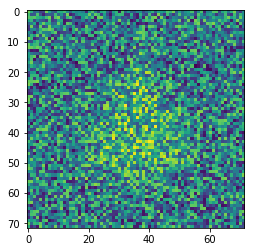

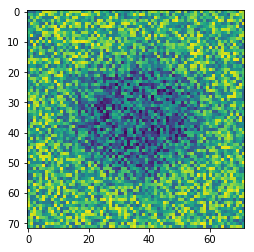

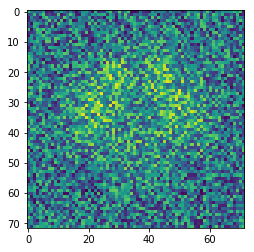

In [11]:
weights=model.get_weights()[0].T
for w in weights:
    plt.imshow(w.reshape(72,72))
    plt.show()
    

# Adam Optimizer

In [12]:
#Training parameters
lr=0.001
epochs=20
bs=32
# numbers of classes
nc=3
model = Sequential()
model.add(Dense(nc, kernel_initializer='uniform', input_shape=(X_train.shape[1],)))
model.add(Activation('softmax'))

adam = optimizers.Adam(lr=lr, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss='categorical_crossentropy', optimizer=adam)

[X_train, Y_train] = generate_dataset_classification(300, 20)
model.fit(X_train, to_categorical(Y_train, num_classes=nc, dtype='float32',), epochs=epochs, batch_size=bs)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
Epoch 1/20
300/300 [==============================] - 2s 8ms/step - loss: 2.0434
Epoch 2/20
300/300 [==============================] - 0s 474us/step - loss: 0.9331
Epoch 3/20
300/300 [==============================] - 0s 640us/step - loss: 0.5785
Epoch 4/20
300/300 [==============================] - 0s 530us/step - loss: 0.4416
Epoch 5/20
300/300 [==============================] - 0s 670us/step - loss: 0.3653
Epoch 6/20
300/300 [==============================] - 0s 570us/step - loss: 0.3339
Epoch 7/20
300/300 [==============================] - 0s 400us/step - loss: 0.4023
Epoch 8/20
300/300 [==============================] - 0s 394us/step - loss: 0.2535
Epoch 9/20
300/300 [==============================] - 0s 490us/step - loss: 0.2430
Epoch 10/20
300/300 [==============================] - 0s 570us/step - loss: 0.2474
Epoch 11/20
300/300 [==========================

# visualization of solutions with Adam

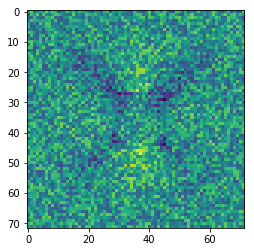

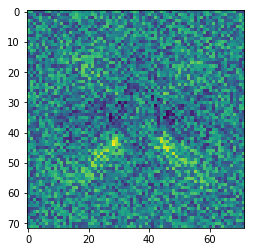

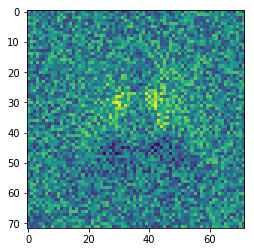

In [13]:
weights=model.get_weights()[0].T
for w in weights:
    plt.imshow(w.reshape(72,72))
    plt.show()

 For the both optimizers, i use a softmax function in order to have a probability distribution implementation and i use a crossentropy function
We can remark that the Adam Optimizer is better than the SGD optimizer. That is  not a surprise

# A more difficult Classification

In [14]:
[X_train, Y_train] = generate_dataset_classification(300, 20, True)
[X_test, Y_test] = generate_test_set_classification()




Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
Train on 200 samples, validate on 100 samples
Epoch 1/20
200/200 [==============================] - 1s 7ms/step - loss: 1.6224 - acc: 0.4400 - val_loss: 1.1509 - val_acc: 0.6000
Epoch 2/20
200/200 [==============================] - 0s 595us/step - loss: 0.9770 - acc: 0.6000 - val_loss: 0.7945 - val_acc: 0.6200
Epoch 3/20
200/200 [==============================] - 0s 595us/step - loss: 0.8217 - acc: 0.6300 - val_loss: 0.7839 - val_acc: 0.4800
Epoch 4/20
200/200 [==============================] - 0s 630us/step - loss: 0.6796 - acc: 0.5850 - val_loss: 0.5926 - val_acc: 0.7500
Epoch 5/20
200/200 [==============================] - 0s 640us/step - loss: 0.5528 - acc: 0.7500 - val_loss: 0.5447 - val_acc: 0.7900
Epoch 6/20
200/200 [==============================] - 0s 645us/step - loss: 0.3967 - acc: 0.8550 - val_loss: 0.4292 - val_acc: 0.7800
Epoch 7/20
200/200 [========

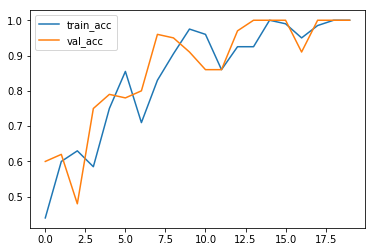

In [15]:
#Training parameters
lr=0.001
epochs=20
bs=32
# numbers of classes
nc=3
model = Sequential()
model.add(Dense(nc, kernel_initializer='uniform', input_shape=(X_train.shape[1],)))
model.add(Activation('softmax'))

adam = optimizers.Adam(lr=lr, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
from keras.callbacks import History 
history = History()
[X_train, Y_train] = generate_dataset_classification(300, 20)
#model.fit(X_train, to_categorical(Y_train, num_classes=nc, dtype='float32',), epochs=epochs, batch_size=bs, callbacks=[history])
history2=model.fit(X_train, to_categorical(Y_train, num_classes=nc, dtype='float32',), validation_split=0.33, epochs=epochs, batch_size=bs, callbacks=[history])
plt.plot(history2.history['acc'], label='train_acc')
plt.plot(history2.history['val_acc'], label='val_acc')
plt.legend()
plt.show()


The loss is 0.1327 and the accuracy is 1.000

# Convolutional model

In [16]:
from keras.layers import Conv2D, MaxPooling2D , Flatten
#Training parameters
lr=0.001
epochs=20
bs=32
nb_neurons=20
# numbers of classes
nc=3

nt=to_categorical(Y_train)
cm=Sequential()
cm.add(Conv2D(16, (5, 5), activation='relu',input_shape=(IMAGE_SIZE, IMAGE_SIZE, 1)))
cm.add(MaxPooling2D(pool_size=(2,2)))

cm.add(Conv2D(32, (5, 5), activation='relu'))
cm.add(Conv2D(32, (5, 5), activation='relu',input_shape=(IMAGE_SIZE, IMAGE_SIZE, 1)))

cm.add(Conv2D(64, (5, 5), activation='relu'))
cm.add(Conv2D(64, (5, 5), activation='relu',input_shape=(IMAGE_SIZE, IMAGE_SIZE, 1)))

cm.add(Flatten())
cm.add(Dense(nb_neurons))
cm.add(Activation('relu'))

cm.add(Dense(nc))
cm.add(Activation('sigmoid'))

cm.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
rX_train = X_train.reshape((X_train.shape[0],IMAGE_SIZE,IMAGE_SIZE,1))

cm.fit(rX_train, to_categorical(Y_train, num_classes=nc, dtype='float32',), epochs=epochs, batch_size=bs, callbacks=[history])



Epoch 1/20
300/300 [==============================] - 31s 103ms/step - loss: 1.1405 - acc: 0.4700
Epoch 2/20
300/300 [==============================] - 30s 99ms/step - loss: 0.8984 - acc: 0.6233
Epoch 3/20
300/300 [==============================] - 30s 99ms/step - loss: 0.8490 - acc: 0.6133
Epoch 4/20
300/300 [==============================] - 30s 99ms/step - loss: 0.5874 - acc: 0.6367
Epoch 5/20
300/300 [==============================] - 27s 89ms/step - loss: 0.4407 - acc: 0.5667
Epoch 6/20
300/300 [==============================] - 26s 87ms/step - loss: 0.3818 - acc: 0.5600
Epoch 7/20
300/300 [==============================] - 27s 91ms/step - loss: 0.3418 - acc: 0.6100
Epoch 8/20
300/300 [==============================] - 29s 97ms/step - loss: 0.3873 - acc: 0.6300
Epoch 9/20
300/300 [==============================] - 34s 114ms/step - loss: 0.3581 - acc: 0.5300
Epoch 10/20
300/300 [==============================] - 30s 100ms/step - loss: 0.3021 - acc: 0.7800
Epoch 11/20
300/300 [=====

Train on 200 samples, validate on 100 samples
Epoch 1/20
200/200 [==============================] - 21s 107ms/step - loss: 0.2045 - acc: 0.7450 - val_loss: 0.2565 - val_acc: 0.6900
Epoch 2/20
200/200 [==============================] - 22s 109ms/step - loss: 0.2045 - acc: 0.7450 - val_loss: 0.2565 - val_acc: 0.6900
Epoch 3/20
200/200 [==============================] - 22s 111ms/step - loss: 0.2045 - acc: 0.7450 - val_loss: 0.2565 - val_acc: 0.6900
Epoch 4/20
200/200 [==============================] - 22s 109ms/step - loss: 0.2045 - acc: 0.7450 - val_loss: 0.2565 - val_acc: 0.6900
Epoch 5/20
200/200 [==============================] - 22s 112ms/step - loss: 0.2045 - acc: 0.7450 - val_loss: 0.2565 - val_acc: 0.6900
Epoch 6/20
200/200 [==============================] - 24s 120ms/step - loss: 0.2045 - acc: 0.7450 - val_loss: 0.2565 - val_acc: 0.6900
Epoch 7/20
200/200 [==============================] - 22s 108ms/step - loss: 0.2045 - acc: 0.7450 - val_loss: 0.2565 - val_acc: 0.6900
Epoch 8/2

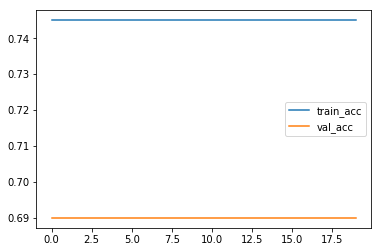

In [17]:
history2=cm.fit(rX_train, to_categorical(Y_train, num_classes=nc, dtype='float32',), validation_split=0.33, epochs=epochs, batch_size=bs)
plt.plot(history2.history['acc'], label='train_acc')
plt.plot(history2.history['val_acc'], label='val_acc')
plt.legend()
plt.show()

 The value of the loss is 0.2565 and the accuracy us 0.6900

In [18]:
[X_test, Y_test] = generate_test_set_classification()
rX_test = X_test.reshape((X_test.shape[0],IMAGE_SIZE,IMAGE_SIZE,1))


Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [19]:
from keras.utils import to_categorical
cm.evaluate(rX_test, Y_test)

300/300 [==============================] - 11s 37ms/step


[4.3562265968322755, 0.31666666706403096]

 The loss is in the left and the accuracy in the right

# A regression problem

In [20]:
[X_train, Y_train] = generate_dataset_regression(300, 20)
[X_test, Y_test] = generate_test_set_regression()
rX_train = X_train.reshape((X_train.shape[0],IMAGE_SIZE,IMAGE_SIZE,1))
rX_test = X_test.reshape((X_test.shape[0],IMAGE_SIZE,IMAGE_SIZE,1))
# Scalling Y_train and Y_test
# Use sigmoid for scalling

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(Y_train)
scaler.fit(Y_test)
sY_train = scaler.transform(Y_train)
sY_test = scaler.transform(Y_test)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [21]:
from keras.layers import Conv2D, MaxPooling2D , Flatten
#Training parameters
lr=0.001
epochs=10
bs=32
nb_neurons=20
# numbers of classes
nc=6

cm=Sequential()
cm.add(Conv2D(16, (5, 5), activation='relu',input_shape=(IMAGE_SIZE, IMAGE_SIZE, 1)))
cm.add(MaxPooling2D(pool_size=(2,2)))

cm.add(Conv2D(32, (5, 5), activation='relu'))
cm.add(Conv2D(32, (5, 5), activation='relu',input_shape=(IMAGE_SIZE, IMAGE_SIZE, 1)))

cm.add(Conv2D(64, (5, 5), activation='relu'))
cm.add(Conv2D(64, (5, 5), activation='relu',input_shape=(IMAGE_SIZE, IMAGE_SIZE, 1)))

cm.add(Flatten())
cm.add(Dense(nb_neurons))
cm.add(Activation('relu'))

cm.add(Dense(nc))
cm.add(Activation('sigmoid'))

cm.compile(loss='mse', optimizer=adam, metrics=['accuracy'])

history2=cm.fit(rX_train, sY_train, validation_data=[rX_test, sY_test], epochs=epochs, batch_size=bs, callbacks=[history])

Train on 300 samples, validate on 300 samples
Epoch 1/10
300/300 [==============================] - 43s 144ms/step - loss: 0.0841 - acc: 0.2133 - val_loss: 0.0843 - val_acc: 0.1867
Epoch 2/10
300/300 [==============================] - 39s 129ms/step - loss: 0.0837 - acc: 0.1967 - val_loss: 0.0841 - val_acc: 0.1867
Epoch 3/10
300/300 [==============================] - 41s 138ms/step - loss: 0.0831 - acc: 0.1933 - val_loss: 0.0816 - val_acc: 0.2267
Epoch 4/10
300/300 [==============================] - 42s 139ms/step - loss: 0.0798 - acc: 0.2667 - val_loss: 0.0794 - val_acc: 0.1867
Epoch 5/10
300/300 [==============================] - 41s 136ms/step - loss: 0.0734 - acc: 0.2400 - val_loss: 0.0746 - val_acc: 0.2367
Epoch 6/10
300/300 [==============================] - 36s 119ms/step - loss: 0.0696 - acc: 0.2233 - val_loss: 0.0709 - val_acc: 0.2533
Epoch 7/10
300/300 [==============================] - 36s 118ms/step - loss: 0.0683 - acc: 0.2500 - val_loss: 0.0702 - val_acc: 0.2533
Epoch 8/1

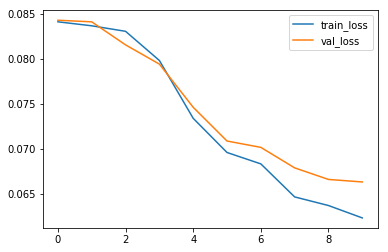

In [22]:

plt.plot(history2.history['loss'], label='train_loss')
plt.plot(history2.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

 I can have better accuracy if i increase the number of epochs

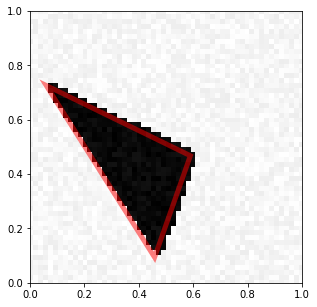

In [23]:
visualize_prediction(X_train[1], Y_train[1])

# Image denoising

In [24]:
def generate_dataset_classification(nb_samples, noise=20, free_location=False):
    # Getting im_size:
    im_size = generate_a_rectangle().shape[0]
    X = np.zeros([nb_samples,im_size])
    X_noise = np.zeros([nb_samples, im_size])
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        category = np.random.randint(3)
        if category == 0:
            X[i] = generate_a_rectangle(noise, free_location)
        elif category == 1: 
            X[i] = generate_a_disk(noise, free_location)
        else:
            [X[i], V] = generate_a_triangle(noise, free_location)
        X_noise[i] =X[i] +np.random.normal(size=im_size)*noise
    X = (X + noise) / (255 + 2 * noise)
    X_noise = (X_noise + noise) / (255 + 2 * noise + noise)
    return [X, X_noise]

 Create a noisy image and a image without noise

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
Creating data:
0
10
20
30
40
50
60
70
80
90


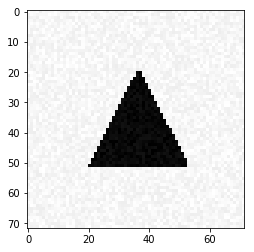

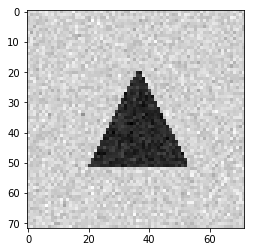

In [65]:
X_train, Y_train =generate_dataset_classification(300, noise=20, free_location=False)
X_test, Y_test =generate_dataset_classification(100, noise=20, free_location=False)

im = X_train[0]
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
#plot a image without noise
plt.show()

im = Y_train[0]
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
#plot a image with noise
plt.show()

Creating data:
0
10
20
30
40
50
60
70
80
90


In [66]:
rX_train = X_train.reshape((X_noise.shape[0],IMAGE_SIZE, IMAGE_SIZE, 1))
rY_train = Y_train.reshape((X_noise.shape[0],IMAGE_SIZE * IMAGE_SIZE))
rX_test = X_test.reshape((X_noise_test.shape[0],IMAGE_SIZE, IMAGE_SIZE,1))
rY_test = Y_test.reshape((X_noise_test.shape[0],IMAGE_SIZE * IMAGE_SIZE))

In [68]:
from keras.layers import Conv2D, MaxPooling2D , Flatten, UpSampling2D
#Training parameters
lr=0.001
epochs=20
bs=32
nb_neurons = IMAGE_SIZE * IMAGE_SIZE
adam = optimizers.Adam(lr=lr, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)


cm=Sequential()

# Bloc 1 : Conv2D
cm.add(Conv2D(8, (5, 5), input_shape=(IMAGE_SIZE, IMAGE_SIZE, 1)))
# Bloc 2 : MaxPool2D
cm.add(MaxPooling2D(pool_size=(3,3)))
# Bloc 3 : Conv2D
cm.add(Conv2D(4, (5, 5), activation='relu'))
# Bloc 4 : MaxPool2D
cm.add(MaxPooling2D(pool_size=(3,3)))
# Bloc 5 : Upsampling2D
cm.add(UpSampling2D((3,3)))
# Bloc 6 : Conv2D
cm.add(Conv2D(8, (5, 5), activation='sigmoid'))
# Bloc 7 : Dense
cm.add(Flatten())
cm.add(Dense(nb_neurons))

cm.compile(loss='mse', optimizer=adam, metrics=['accuracy'])
cm.fit(rX_train, rY_train, epochs=epochs, batch_size=bs)




Epoch 1/20
300/300 [==============================] - 26s 85ms/step - loss: 0.2417 - acc: 0.0000e+00
Epoch 2/20
300/300 [==============================] - 14s 45ms/step - loss: 0.1073 - acc: 0.0033
Epoch 3/20
300/300 [==============================] - 13s 44ms/step - loss: 0.0681 - acc: 0.0033
Epoch 4/20
300/300 [==============================] - 13s 44ms/step - loss: 0.0452 - acc: 0.0000e+00
Epoch 5/20
300/300 [==============================] - 13s 42ms/step - loss: 0.0337 - acc: 0.0000e+00
Epoch 6/20
300/300 [==============================] - 13s 42ms/step - loss: 0.0295 - acc: 0.0000e+00
Epoch 7/20
300/300 [==============================] - 13s 45ms/step - loss: 0.0272 - acc: 0.0000e+00
Epoch 8/20
300/300 [==============================] - 13s 43ms/step - loss: 0.0261 - acc: 0.0000e+00
Epoch 9/20
300/300 [==============================] - 12s 41ms/step - loss: 0.0243 - acc: 0.0000e+00
Epoch 10/20
300/300 [==============================] - 12s 42ms/step - loss: 0.0229 - acc: 0.0000e+

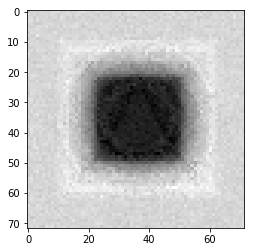

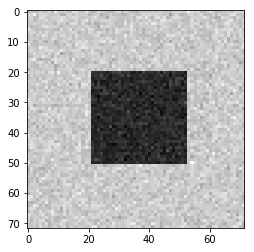

In [69]:
pred = cm.predict(rX_test)

im = pred[0]
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
#plot a image without noise
plt.show()

im = rY_test[0]
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
#plot a image with noise
plt.show()



 I don't have a good prediction because the accuracy is zero. I didn't use a great number of epochs and perhaps it's also the cause of my approach.
Neverthereless, i have a better image but we can ameliorate this result